In [77]:
import imageio
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import kurtosis, skew

In [4]:
import sys
sys.executable

'/usr/bin/python3'

In [24]:
path_fourier = '/mnt/ncshare/ai4covid_hackathon/preprocessed_data/train/fourier_2d/'
path_orig = '/mnt/ncshare/ai4covid_hackathon/preprocessed_data/train/aligned/'

In [23]:
#!ls /mnt/ncshare/ai4covid_hackathon/preprocessed_data/train/aligned

In [7]:
!ls /mnt/ncshare/ai4covid_hackathon/preprocessed_data/tables

age_avg		  trainClinData.csv	 validClinData_cv1.csv
hosp_avg	  trainClinData_cv1.csv  validClinData_cv2.csv
hosp_sampled	  trainClinData_cv2.csv  validClinData_cv3.csv
pop_avg		  trainClinData_cv3.csv  validClinData_cv4.csv
pop_sampled	  trainClinData_cv4.csv  validClinData_cv5.csv
testClinData.csv  trainClinData_cv5.csv


In [8]:
df_test = pd.read_csv('/mnt/ncshare/ai4covid_hackathon/preprocessed_data/tables/testClinData.csv')
df_train = pd.read_csv('/mnt/ncshare/ai4covid_hackathon/preprocessed_data/tables/trainClinData.csv')
df_train.head(3)

Row_number  ImageFile Hospital        Age  Sex  PositivityAtAdmission  \
0          82  P_102.png        A  72.000000    1                    1.0   
1         228  P_131.png        D  35.913889    0                    1.0   
2         229  P_132.png        D  57.266667    0                    1.0   

   Temp_C  DaysFever  Cough  DifficultyInBreathing  ...  Diabetes  Dementia  \
0    37.3        3.0    1.0                    0.0  ...       0.0       0.0   
1    39.3        3.0    1.0                    0.0  ...       0.0       0.0   
2    37.0        3.0    0.0                    0.0  ...       0.0       0.0   

   BPCO  Cancer  ChronicKidneyDisease  RespiratoryFailure  Obesity  Position  \
0   0.0     1.0                   0.0                 0.0      0.0       0.0   
1   0.0     0.0                   0.0                 NaN      1.0       0.0   
2   0.0     0.0                   0.0                 NaN      NaN       0.0   

   Prognosis  Death  
0     SEVERE      0  
1       MILD      0  
2       MILD      0  

[3 rows x 40 columns]

In [11]:
df_train.groupby('Prognosis').size()

Prognosis
MILD      535
SEVERE    568
dtype: int64

In [381]:
ns = len(df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values)
nm= len(df_train[df_train['Prognosis']=='MILD']['ImageFile'].values)

In [336]:
mild_orig = np.zeros([512,512])

for id in df_train[df_train['Prognosis']=='MILD']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     mild_orig += im

mild_orig /= len(df_train[df_train['Prognosis']=='MILD']['ImageFile'].values)

In [340]:
severe_orig = np.zeros([512,512])
for id in df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     severe_orig += im

severe_orig /= len(df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values)

In [339]:
mild_fft = np.zeros([512,512])
for id in df_train[df_train['Prognosis']=='MILD']['ImageFile'].values:
     im = imageio.imread(path_fourier + id)
     mild_fft += im

mild_fft /= len(df_train[df_train['Prognosis']=='MILD']['ImageFile'].values)

In [341]:
severe_fft = np.zeros([512,512])
for id in df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values:
     im = imageio.imread(path_fourier + id)
     severe_fft += im

severe_fft /= len(df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values)

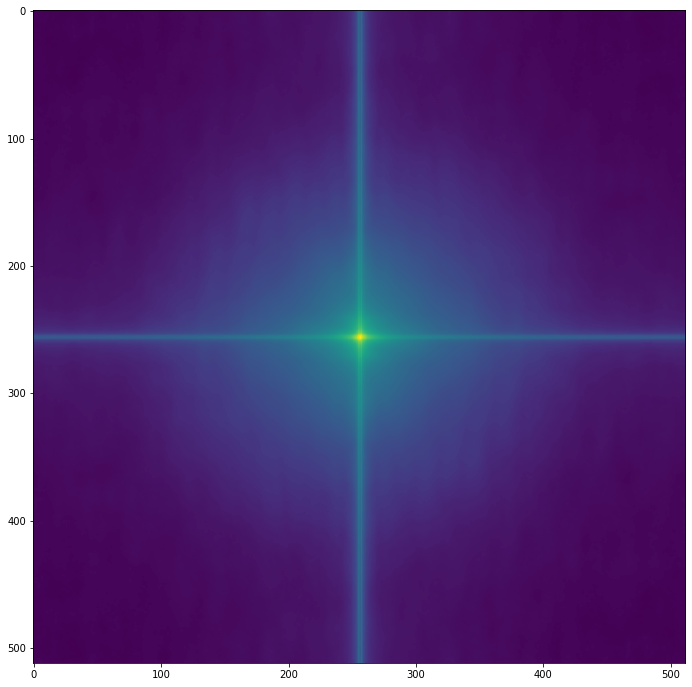

In [342]:
plt.figure(figsize=[12,12])
plt.imshow(mild_fft)

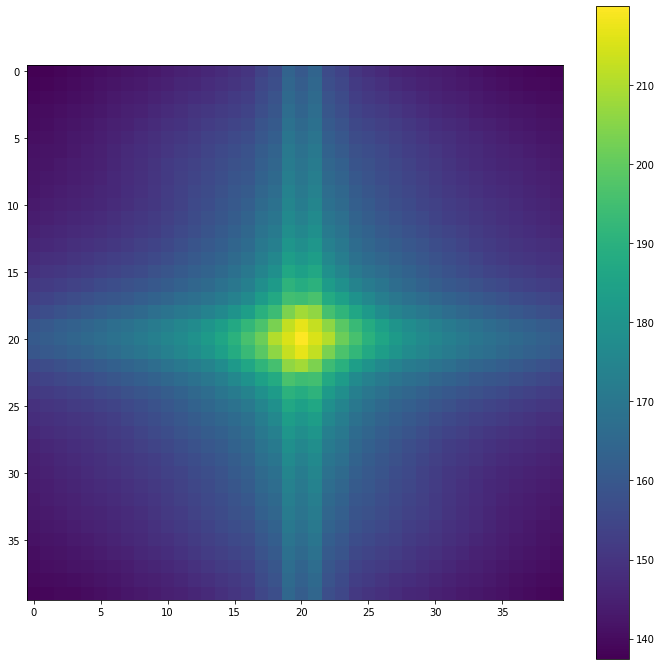

In [501]:
plt.figure(figsize=[12,12])
plt.imshow(mild_fft[256-20:256+20,256-20:256+20])
plt.colorbar()

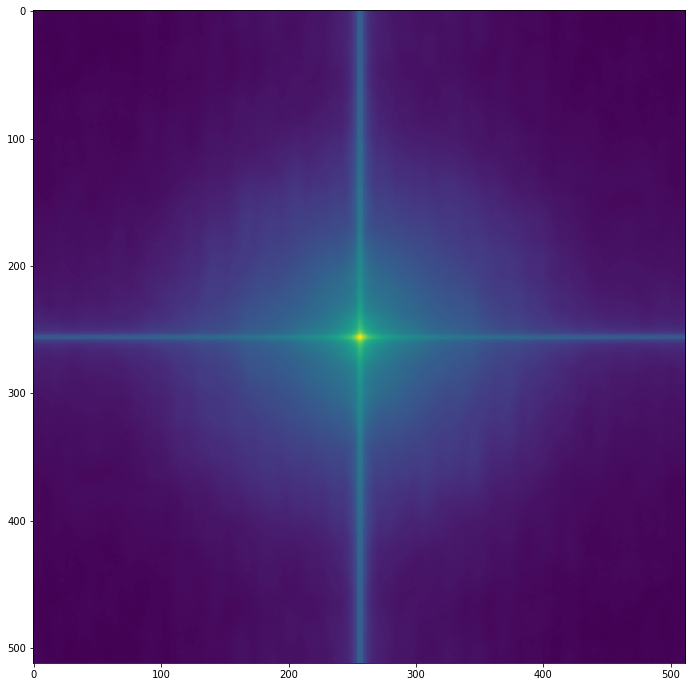

In [343]:
plt.figure(figsize=[12,12])
plt.imshow(severe_fft)

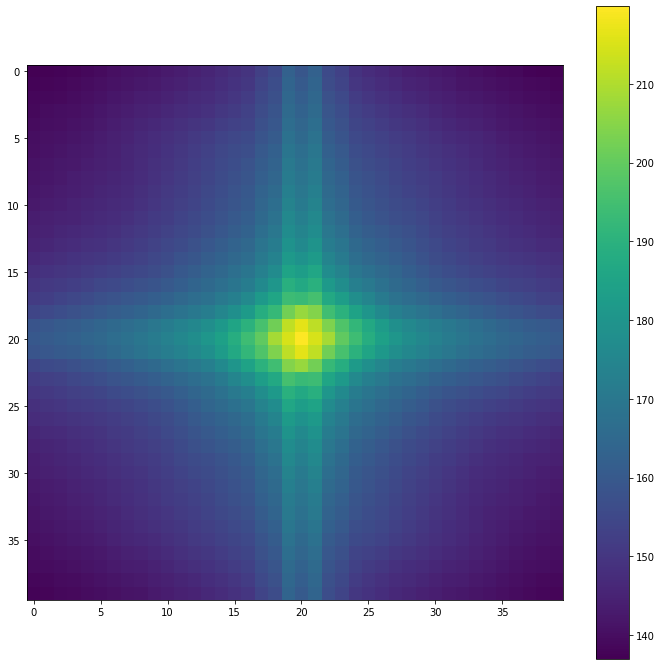

In [502]:
plt.figure(figsize=[12,12])
plt.imshow(severe_fft[256-20:256+20,256-20:256+20])
plt.colorbar()

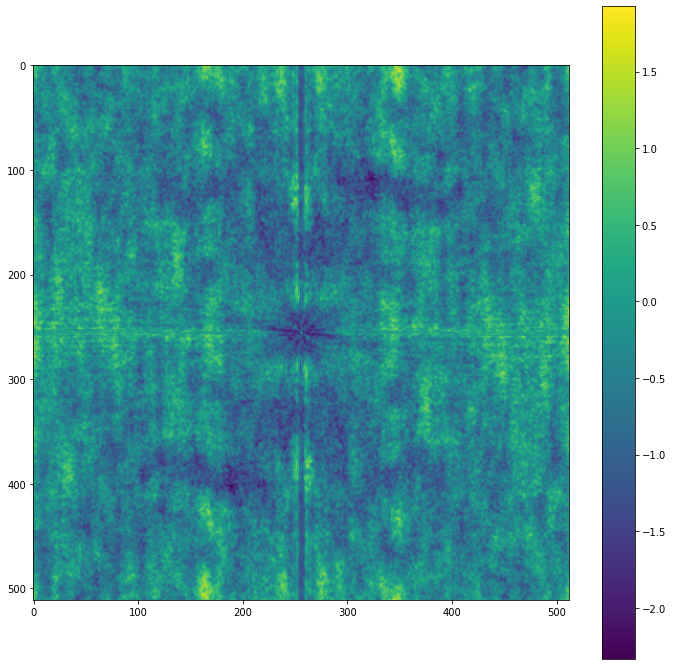

In [344]:
plt.figure(figsize=[12,12])
diff_fft = severe_fft-mild_fft
plt.imshow(diff_fft)
plt.colorbar()

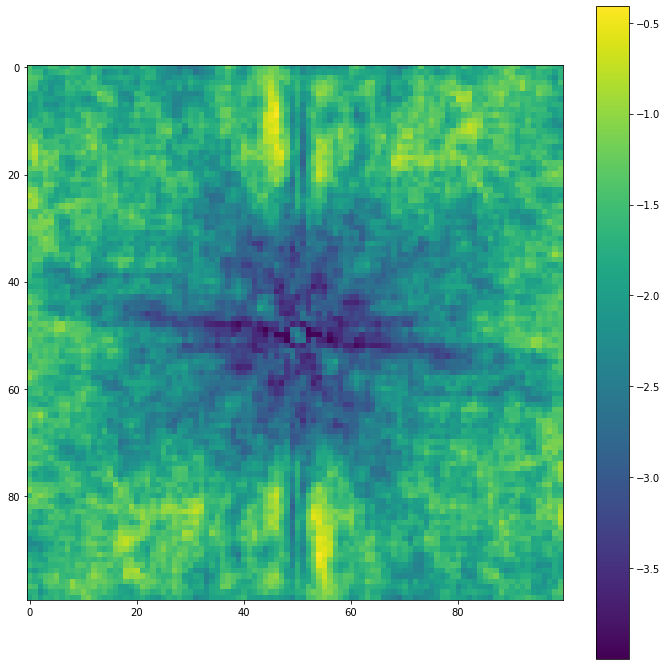

In [518]:
plt.figure(figsize=[12,12])
diff_fft = severe_fft-1.01*mild_fft
plt.imshow(diff_fft[256-50:256+50,256-50:256+50])
plt.colorbar()

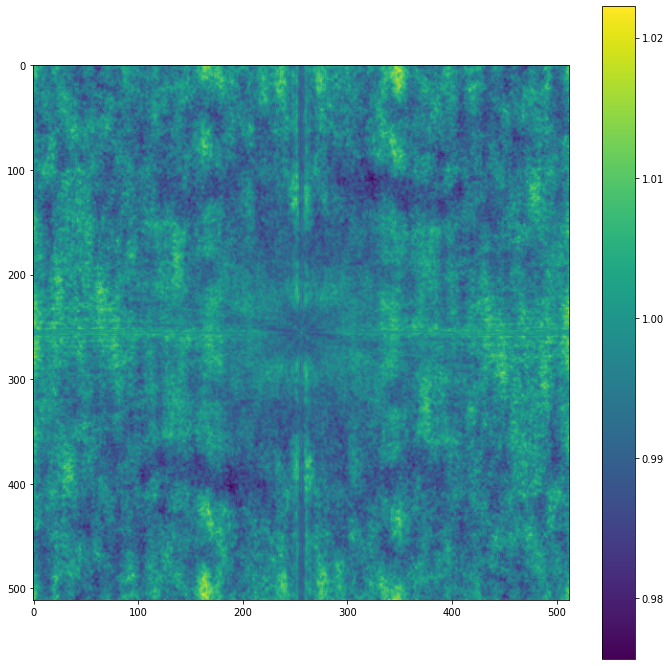

In [345]:
plt.figure(figsize=[12,12])
plt.imshow(severe_fft/mild_fft)
plt.colorbar()

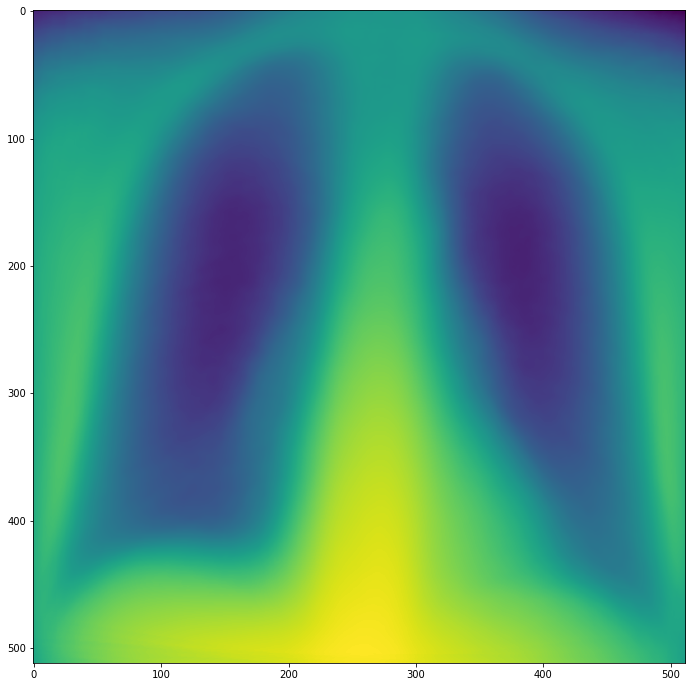

In [346]:
plt.figure(figsize=[12,12])
plt.imshow(mild_orig)

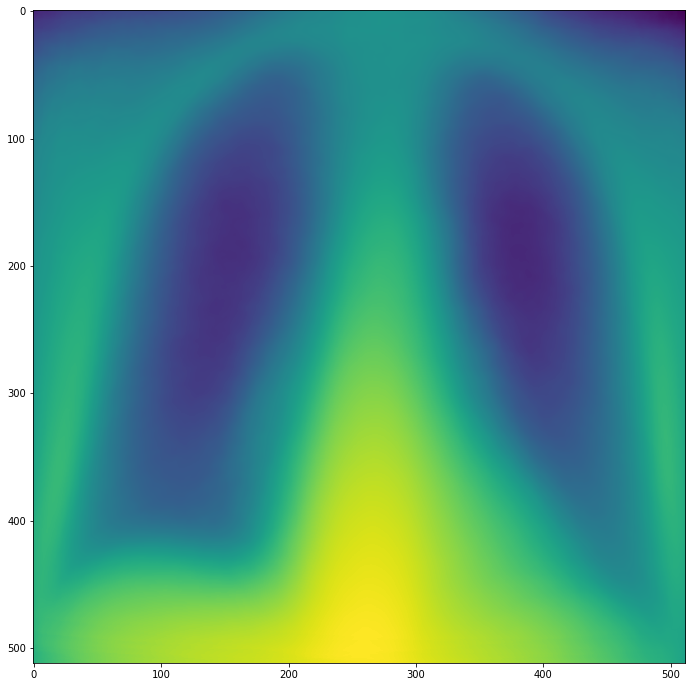

In [347]:
plt.figure(figsize=[12,12])
plt.imshow(severe_orig)

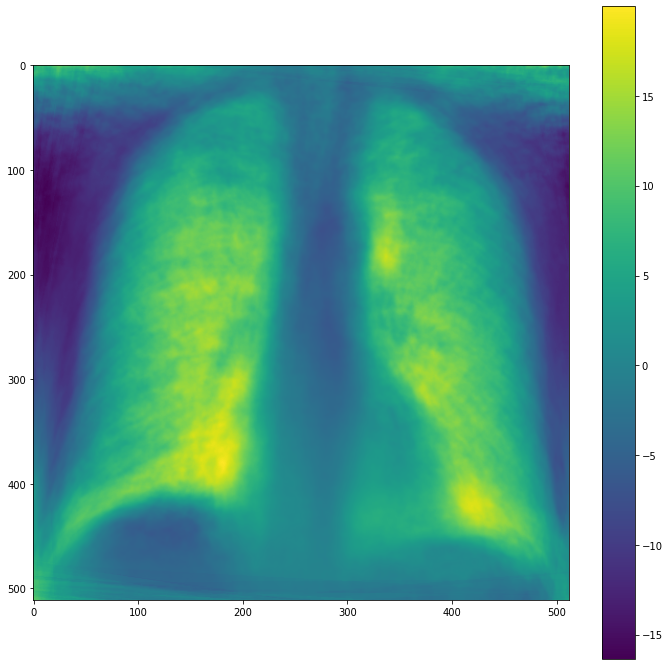

In [394]:
plt.figure(figsize=[12,12])
diff_orig = severe_orig-mild_orig
plt.imshow(diff_orig)#,cmap='gray')
plt.colorbar()

np.save('diff.npy',diff_orig)

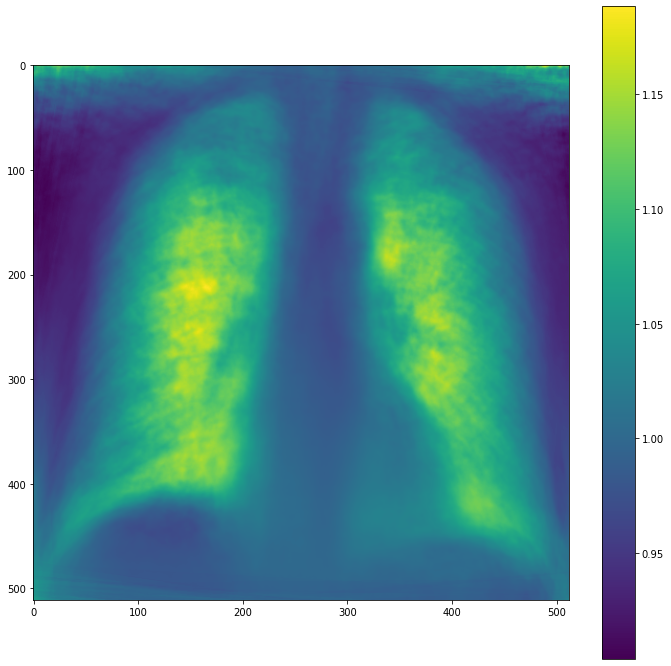

In [395]:
plt.figure(figsize=[12,12])
plt.imshow(severe_orig/mild_orig)#,cmap='gray')
plt.colorbar()

np.save('ratio.npy',severe_orig/mild_orig)

### FFT of differences of the stacks
- Should this be the same as difference of the stacked FFT images???
- the problem may be that we used the log(abs(fft)) images ....

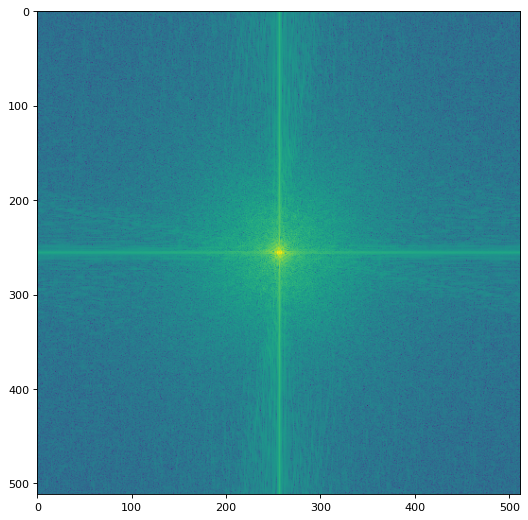

In [350]:

f = np.fft.fft2(severe_orig-mild_orig)
f_s = np.fft.fftshift(f)
plt.figure(num=None, figsize=(10, 8), dpi=80)
plt.imshow(np.log(abs(f_s)))#, cmap='gray');


### Correlate individual images with the stacked diff

In [351]:
mild_orig_stack_diff = []
for id in df_train[df_train['Prognosis']=='MILD']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     mild_orig_stack_diff.append([np.mean(im-diff_orig),np.std(im-diff_orig),np.mean(im*diff_orig),np.std(im*diff_orig), 
           skew((im-diff_orig).flatten()), skew((im*diff_orig).flatten()),
           kurtosis((im-diff_orig).flatten()), kurtosis((im*diff_orig).flatten())])
mild_orig_stack_diff = np.array(mild_orig_stack_diff)

In [352]:
severe_orig_stack_diff = []
for id in df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     severe_orig_stack_diff.append([np.mean(im-diff_orig),np.std(im-diff_orig),np.mean(im*diff_orig),np.std(im*diff_orig), 
           skew((im-diff_orig).flatten()), skew((im*diff_orig).flatten()),
           kurtosis((im-diff_orig).flatten()), kurtosis((im*diff_orig).flatten())])
severe_orig_stack_diff = np.array(severe_orig_stack_diff)

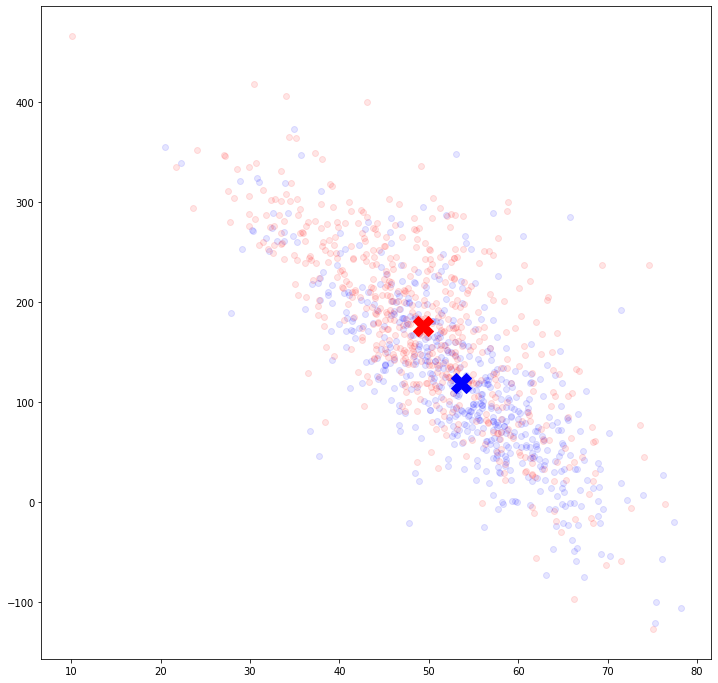

In [355]:
plt.figure(figsize=[12,12])
plt.plot(mild_orig_stack_diff[:,1],mild_orig_stack_diff[:,2],'o', alpha=0.1, c='b')
plt.plot(severe_orig_stack_diff[:,1],severe_orig_stack_diff[:,2],'o', alpha=0.1, c='r')
plt.plot(mild_orig_stack_diff.mean(axis=0)[1], mild_orig_stack_diff.mean(axis=0)[2],'X', alpha=1, c='b',markersize=20)
plt.plot(severe_orig_stack_diff.mean(axis=0)[1], severe_orig_stack_diff.mean(axis=0)[2],'X', alpha=1, c='r',markersize=20)

In [354]:
print(mild_orig_stack_diff.mean(axis=0), severe_orig_stack_diff.mean(axis=0))
print(mild_orig_stack_diff.std(axis=0), severe_orig_stack_diff.std(axis=0))

print((mild_orig_stack_diff.mean(axis=0)-severe_orig_stack_diff.mean(axis=0))/(mild_orig_stack_diff.std(axis=0) +severe_orig_stack_diff.std(axis=0)) )

[ 1.53661562e+02  5.35494055e+01  1.19023902e+02  1.07419933e+03
 -1.79717758e-01 -4.33503509e-01 -8.26921225e-01  9.38813477e-02] [ 1.55549890e+02  4.93257315e+01  1.75478619e+02  1.08766099e+03
 -1.48176077e-01 -2.31500734e-01 -5.72102077e-01 -4.97541479e-02]
[ 18.10341988   9.09206094  82.0042715  133.51814858   0.25704234
   0.27466873   0.53920842   0.33921681] [ 19.22449503   9.60100803  85.56516187 143.86457377   0.3166044
   0.26185334   0.73585335   0.33009561]
[-0.05058754  0.22594867 -0.33690343 -0.04853098 -0.0549845  -0.37650413
 -0.19984847  0.21460157]


### Correlate individual FFT images with the stacked diff

In [356]:
mild_fft_stack_diff = []
for id in df_train[df_train['Prognosis']=='MILD']['ImageFile'].values:
     im = imageio.imread(path_fourier + id)
     mild_fft_stack_diff.append([np.mean(im-diff_fft),np.std(im-diff_fft),np.mean(im*diff_fft),np.std(im*diff_fft), 
        skew((im-diff_fft).flatten()), skew((im*diff_fft).flatten()),
        kurtosis((im-diff_fft).flatten()), kurtosis((im*diff_fft).flatten())])
mild_fft_stack_diff = np.array(mild_fft_stack_diff)

In [357]:
severe_fft_stack_diff = []
for id in df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values:
     im = imageio.imread(path_fourier + id)
     severe_fft_stack_diff.append([np.mean(im-diff_fft),np.std(im-diff_fft),np.mean(im*diff_fft),np.std(im*diff_fft), 
        skew((im-diff_fft).flatten()), skew((im*diff_fft).flatten()),
        kurtosis((im-diff_fft).flatten()), kurtosis((im*diff_fft).flatten())])
severe_fft_stack_diff = np.array(severe_fft_stack_diff)

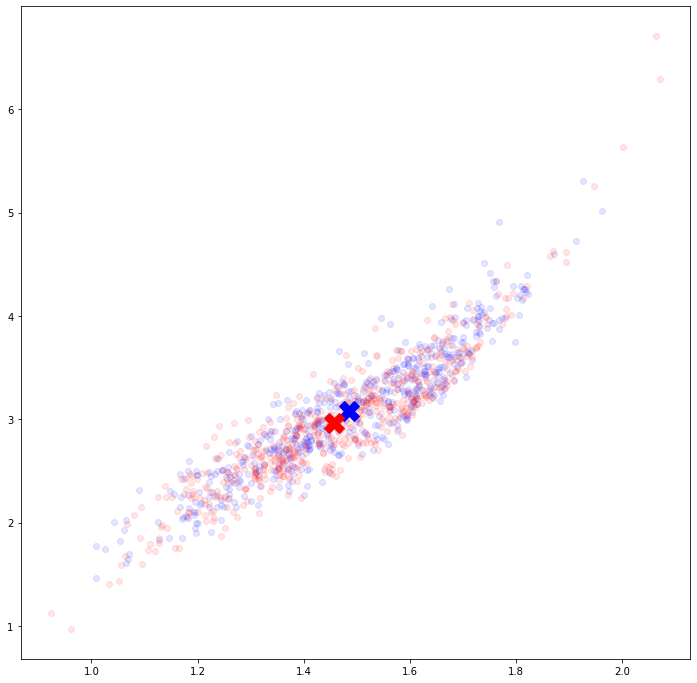

In [358]:
plt.figure(figsize=[12,12])
id1 = 4
id2 = 6
plt.plot(mild_fft_stack_diff[:,id1],mild_fft_stack_diff[:,id2],'o', alpha=0.1, c='b')
plt.plot(severe_fft_stack_diff[:,id1],severe_fft_stack_diff[:,id2],'o', alpha=0.1, c='r')
plt.plot(mild_fft_stack_diff.mean(axis=0)[id1], mild_fft_stack_diff.mean(axis=0)[id2],'X', alpha=1, c='b',markersize=20)
plt.plot(severe_fft_stack_diff.mean(axis=0)[id1], severe_fft_stack_diff.mean(axis=0)[id2],'X', alpha=1, c='r',markersize=20)

In [359]:
print(mild_fft_stack_diff.mean(axis=0), severe_fft_stack_diff.mean(axis=0))
print(mild_fft_stack_diff.std(axis=0), severe_fft_stack_diff.std(axis=0))

print((mild_fft_stack_diff.mean(axis=0)-severe_fft_stack_diff.mean(axis=0))/(mild_fft_stack_diff.std(axis=0) +severe_fft_stack_diff.std(axis=0)) )

[ 96.26250856  14.94093095 -39.23966247  47.60592677   1.48583913
  -0.47201143   3.08554453   1.65860134] [ 95.86344024  14.92652653 -38.86907781  47.24544682   1.45733702
  -0.44624744   2.96859909   1.64554275]
[7.10593466 0.83673793 2.79717731 3.00045168 0.18003626 0.08488274
 0.6005945  0.33175449] [5.86402814 0.78588657 2.34349855 2.4819616  0.1762206  0.08042042
 0.60893146 0.31113648]
[ 0.03076866  0.00887723 -0.0720887   0.06575206  0.08000439 -0.15585905
  0.096687    0.0203123 ]


### Top to bottom mean

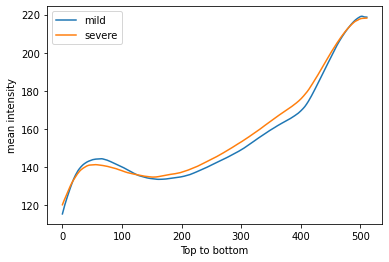

In [360]:
plt.plot(mild_orig.mean(axis=1),label='mild')
plt.plot(severe_orig.mean(axis=1),label='severe')
plt.xlabel('Top to bottom')
plt.ylabel('mean intensity')
plt.legend()

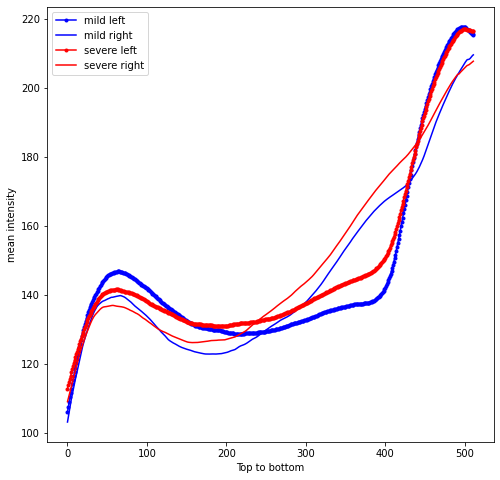

In [361]:
plt.figure(figsize=[8,8])
x = 200
plt.plot(mild_orig[:,:x].mean(axis=1),'.-',label='mild left',c='b')
plt.plot(mild_orig[:,-x:].mean(axis=1),label='mild right',c='b')

plt.plot(severe_orig[:,:x].mean(axis=1),'.-',label='severe left',c='r')
plt.plot(severe_orig[:,-x:].mean(axis=1),label='severe right',c='r')

plt.xlabel('Top to bottom')
plt.ylabel('mean intensity')
plt.legend()

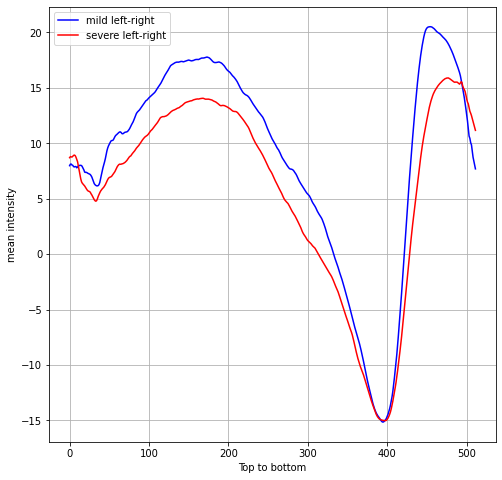

In [362]:
plt.figure(figsize=[8,8])
x = 150
plt.plot(mild_orig[:,:x].mean(axis=1)-mild_orig[:,-x:].mean(axis=1),'-',label='mild left-right',c='b')


plt.plot(severe_orig[:,:x].mean(axis=1)-severe_orig[:,-x:].mean(axis=1),'-',label='severe left-right',c='r')

plt.grid()

plt.xlabel('Top to bottom')
plt.ylabel('mean intensity')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


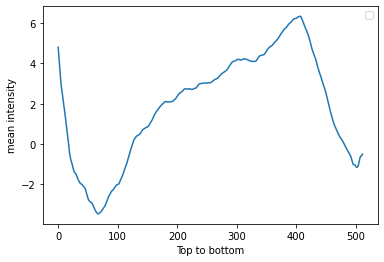

In [363]:
plt.plot(severe_orig.mean(axis=1)-mild_orig.mean(axis=1))
plt.xlabel('Top to bottom')
plt.ylabel('mean intensity')
plt.legend()

In [364]:
mild_1d = []
for id in df_train[df_train['Prognosis']=='MILD']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     mild_1d.append(im.mean(axis=1))

mild_1d = np.array(mild_1d)

mild_1d /= len(df_train[df_train['Prognosis']=='MILD']['ImageFile'].values)

In [365]:
severe_1d = []
for id in df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     severe_1d.append(im.mean(axis=1))

severe_1d = np.array(severe_1d)

severe_1d /= len(df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values)

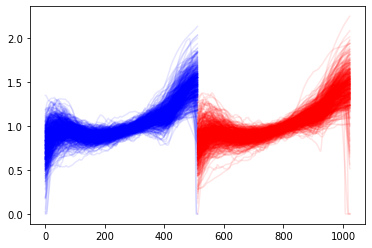

In [366]:
plt.plot(np.arange(512),(mild_1d/mild_1d[:,50:-50].mean(axis=1,keepdims=True)).T,color='b',alpha=0.1)
_ = plt.plot(np.arange(512)+512,(severe_1d/severe_1d[:,50:-50].mean(axis=1,keepdims=True)).T,color='r',alpha=0.1)

In [254]:
import scipy
from scipy import linalg as la

In [469]:
#Um,Sm,Vm = la.svd(np.concatenate([mild_1d,severe_1d]))
m1 = mild_1d/mild_1d[:,200:-200].mean(axis=1,keepdims=True)
s1 = severe_1d/severe_1d[:,200:-200].mean(axis=1,keepdims=True)
Um,Sm,Vm = la.svd(np.concatenate([m1,s1]))

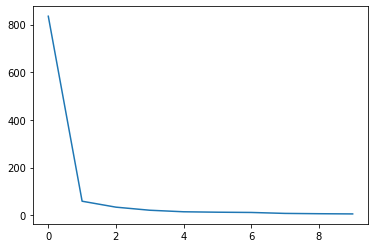

In [471]:
plt.plot(Sm[:10])

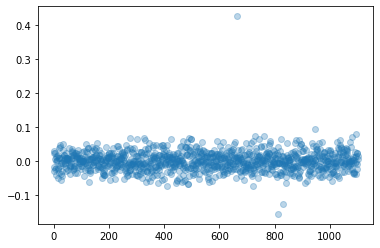

In [587]:
plt.plot(Um[1,:],'o',alpha=0.3)

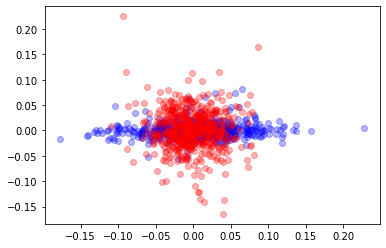

In [488]:
plt.plot(Um[5,:535]+Um[9,:535],Um[10,:535],'o',alpha=0.3,c='b')
plt.plot(Um[5,535:]+Um[9,535:],Um[10,535:],'o',alpha=0.3,c='r')

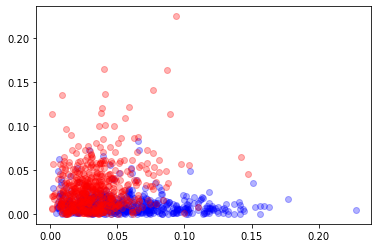

In [489]:
plt.plot(np.abs(Um[5,:535])+np.abs(Um[9,:535]),np.abs(Um[10,:535]),'o',alpha=0.3,c='b')
plt.plot(np.abs(Um[5,535:])+np.abs(Um[9,535:]),np.abs(Um[10,535:]),'o',alpha=0.3,c='r')

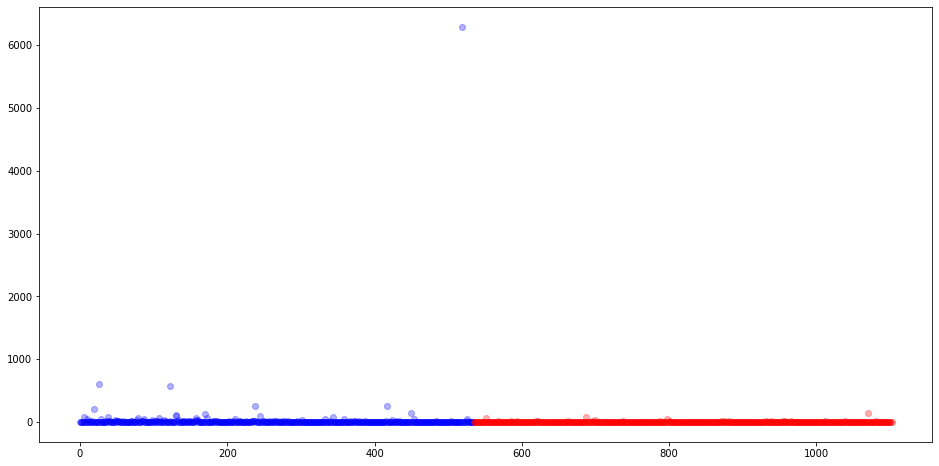

In [459]:
plt.figure(figsize=[16,8])
plt.plot(np.arange(nm),np.abs(Um[5,:535])/np.abs(Um[10,:535]),'o',alpha=0.3,c='b')
plt.plot(np.arange(ns)+nm,np.abs(Um[5,535:])/np.abs(Um[10,535:]),'o',alpha=0.3,c='r')
#plt.ylim(0,100)

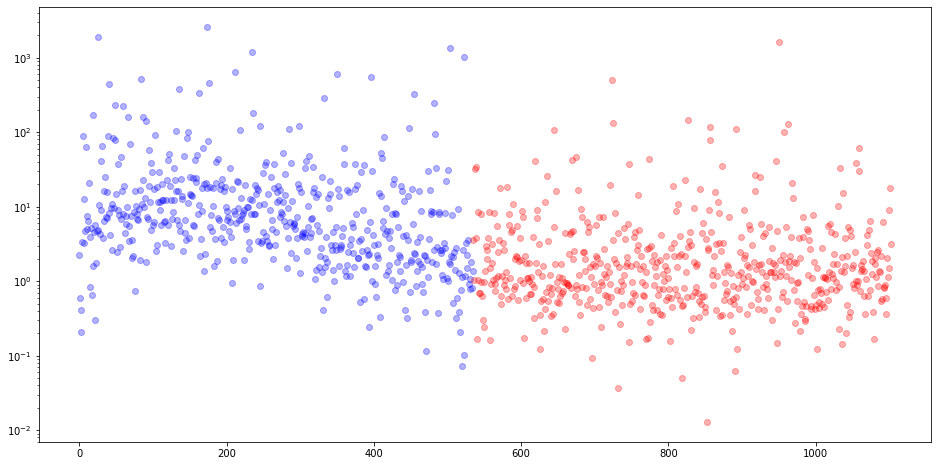

In [490]:
plt.figure(figsize=[16,8])
plt.semilogy(np.arange(nm),(np.abs(Um[5,:535])+np.abs(Um[9,:535]))/np.abs(Um[10,:535]),'o',alpha=0.3,c='b')
plt.semilogy(np.arange(ns)+nm,(np.abs(Um[5,535:])+np.abs(Um[9,535:]))/np.abs(Um[10,535:]),'o',alpha=0.3,c='r')
#plt.ylim(0,100)

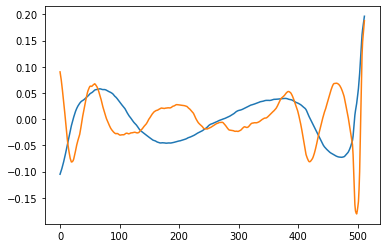

In [461]:
plt.plot(Vm[5,:])
plt.plot(Vm[10,:])

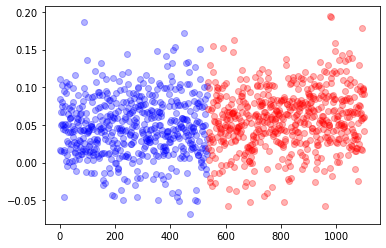

In [462]:
plt.plot(np.arange(nm),mild_1d[:,380]-mild_1d[:,100],'o',alpha=0.3,c='b')
plt.plot(np.arange(ns)+nm,severe_1d[:,380]-severe_1d[:,100],'o',alpha=0.3,c='r')

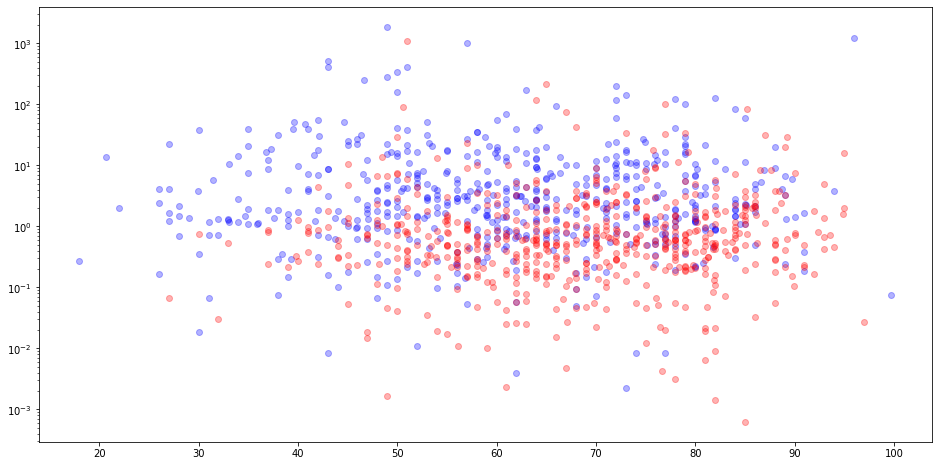

In [486]:
plt.figure(figsize=[16,8])
plt.semilogy(df_train[df_train['Prognosis']=='MILD']['Age'].values,np.abs(Um[9,:535])/np.abs(Um[10,:535]),'o',alpha=0.3,c='b')
plt.semilogy(df_train[df_train['Prognosis']=='SEVERE']['Age'].values,np.abs(Um[9,535:])/np.abs(Um[10,535:]),'o',alpha=0.3,c='r')

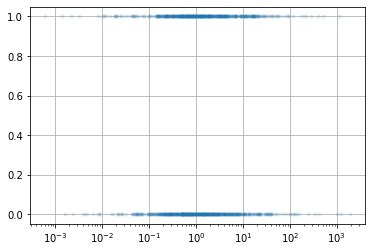

In [485]:
plt.semilogx(np.abs(Um[9,:])/np.abs(Um[10,:]),df_train['Prognosis']=='MILD','.',alpha=0.1)
plt.grid()

### patches

In [450]:
mild_patch = []
for id in df_train[df_train['Prognosis']=='MILD']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     #im = im/im.mean()
     mild_patch.append(im[350:400,150:200].mean()-0*im[350:400,320:370].mean())
     #mild_patch.append(im[40:480,40:256-50].mean()-im[40:480,256+50:-40].mean())

mild_patch = np.array(mild_patch)
mild_patch /= nm

In [433]:
severe_patch = []
for id in df_train[df_train['Prognosis']=='SEVERE']['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     #im = im/im.mean()
     severe_patch.append(im[350:400,150:200].mean()-0*im[350:400,320:370].mean())
     #severe_patch.append(im[40:480,40:256-50].mean()-im[40:480,256+50:-40].mean())

severe_patch = np.array(severe_patch)
severe_patch /= ns

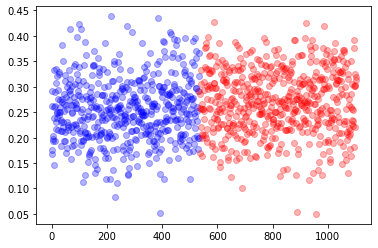

In [434]:
plt.plot(np.arange(nm),mild_patch,'o',c='b',alpha=0.3)
plt.plot(np.arange(ns)+nm,severe_patch,'o',c='r',alpha=0.3)

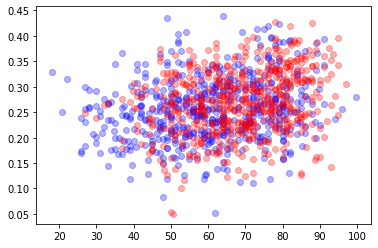

In [451]:
plt.plot(df_train[df_train['Prognosis']=='MILD']['Age'].values,mild_patch,'o',c='b',alpha=0.3)
plt.plot(df_train[df_train['Prognosis']=='SEVERE']['Age'].values,severe_patch,'o',c='r',alpha=0.3)

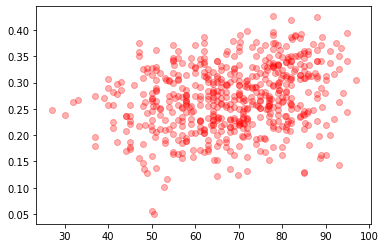

In [436]:
plt.plot(df_train[df_train['Prognosis']=='SEVERE']['Age'].values,severe_patch,'o',c='r',alpha=0.3)

In [437]:
import numpy.ma as ma
print(np.corrcoef(df_train[df_train['Prognosis']=='MILD']['Age'].values,mild_patch)[0,1])

_ = df_train[df_train['Prognosis']=='SEVERE']['Age'].values
_ = np.where(np.isnan(_), ma.array(_, mask=np.isnan(_)).mean(axis=0), _) 
print(np.corrcoef(_,severe_patch)[0,1])

0.20339173814387657
0.2519764349972194


In [495]:
df_train[df_train['Prognosis']=='SEVERE']['Hospital']

0       A
4       A
6       D
7       D
9       D
       ..
1097    C
1098    C
1100    C
1101    C
1102    C
Name: Hospital, Length: 568, dtype: object

In [498]:
df_train.groupby(['Hospital','Prognosis']).size()

Hospital  Prognosis
A         MILD          35
          SEVERE        85
B         MILD          59
          SEVERE        45
C         MILD          70
          SEVERE        81
D         MILD          76
          SEVERE        63
E         MILD          55
          SEVERE        46
F         MILD         240
          SEVERE       248
dtype: int64

### 2D pca

In [575]:
idx_F = df_train['Hospital']!='XXXX'

img_flat = []
img_F1 = []
img_F1_12 = []

for id in df_train[idx_F]['ImageFile'].values:
     im = imageio.imread(path_orig + id)
     img_flat.append(im.flatten())
     img_F1.append(im.mean(axis=1))
     img_F1_12.append(np.concatenate([im[:,:256].mean(axis=1),im[:,256:].mean(axis=1)]))

img_flat = np.array(img_flat)
img_F1 = np.array(img_F1)
img_F1_12 = np.array(img_F1_12)

In [581]:
img_F1.shape

(1103, 512)

In [576]:
U2,S2,V2 = la.svd(img_flat,full_matrices=False)


In [726]:

U1,S1,V1 = la.svd(img_F1,full_matrices=True)
#U1,S1,V1 = la.svd(img_F1/img_F1[:,200:-200].mean(axis=1,keepdims=True),full_matrices=True)
U1_12,S1_12,V1_12 = la.svd(img_F1_12,full_matrices=False)
#U1_12,S1_12,V1_12 = la.svd(img_F1_12/img_F1_12[:,200:-200].mean(axis=1,keepdims=True),full_matrices=True)

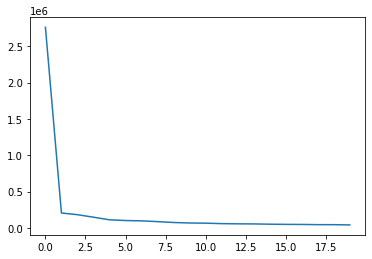

In [830]:
plt.plot(S2[:20])

In [584]:
#isSevere = df_train[idx_F]['Prognosis']=='SEVERE'
isSevere = df_train[idx_F]['Prognosis']=='SEVERE'

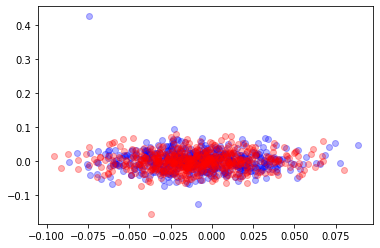

In [598]:
plt.plot(Um[0,~isSevere],Um[1,~isSevere],'o',alpha=0.3,c='b')
plt.plot(Um[0,isSevere],Um[1,isSevere],'o',alpha=0.3,c='r')

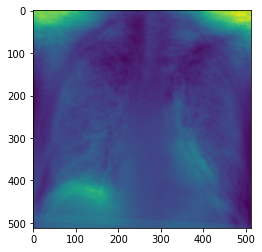

In [541]:
plt.imshow(V2[7].reshape([512,512]))

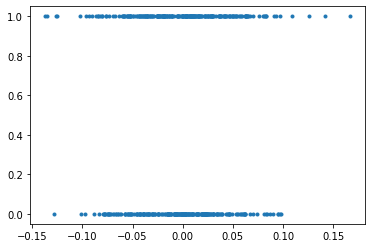

In [565]:
plt.plot(U1[1,:],isSevere,'.')

In [629]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    U2[:,:].T, isSevere, random_state=1121218
)



In [630]:
xgb_cl = xgb.XGBClassifier() 

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)


/home/csabai/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5108695652173914

In [788]:
#X_train, X_test, y_train, y_test = train_test_split(
#    np.concatenate([Um[0:,:],np.abs(Um[0:,:])]).T, isSevere, random_state=1121218
#)

X_train, X_test, y_train, y_test = train_test_split(
    img_F1[:,:], isSevere
)
# , random_state=1121218

from sklearn.linear_model import LogisticRegression,  ElasticNet
from sklearn import svm

#clf = svm.SVC()
#clf = xgb.XGBClassifier()
clf = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.9)

# Fit
clf.fit(X_train, y_train)

# Predict
preds = clf.predict(X_test)

# Score
accuracy_score(y_test, preds)


/home/csabai/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6413043478260869

In [799]:
#X_train, X_test, y_train, y_test = train_test_split(
#    img_F1[:,:], isSevere
#)

X_train, X_test, y_train, y_test = train_test_split(
    U2[:,:], isSevere
)

f1_pred = []
f1_l1 = []

for l1 in np.linspace(0,1,5):
    for i in range(1):
        clf = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=l1,max_iter=500,random_state=1000*i-i)
        # Fit
        clf.fit(X_train, y_train)
        # Predict
        preds = clf.predict(X_test)
        # Score
        a = accuracy_score(y_test, preds)
        f1_pred.append(a)
        f1_l1.append(l1)
        #print(l1)


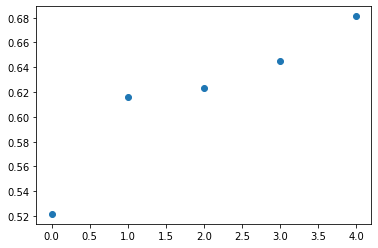

In [800]:
plt.plot(f1_pred,'o')

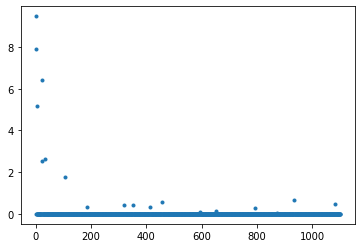

In [826]:
importance = clf.coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.plot([x for x in range(len(importance))], np.abs(importance),'.')
#pyplot.show()

In [810]:
np.sum(np.abs(importance)>0)

19

In [842]:
np.abs(importance).argsort()[-19:]

array([ 656,  873,  596,  651,  794,  184,  412,  321,  353, 1085,  457,
        936,  105,   21,   33,    4,   23,    2,    1])

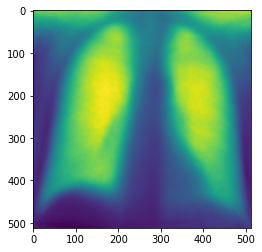

In [844]:
plt.imshow(V2[1].reshape([512,512]))

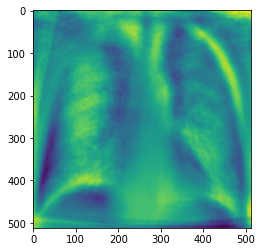

In [825]:
plt.imshow(V2[23].reshape([512,512]))

In [831]:
U2.shape

(1103, 1103)

In [833]:
U1_12.shape

(1103, 1024)

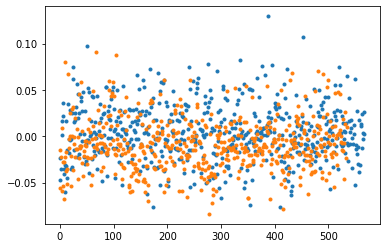

In [837]:
plt.plot(U2[isSevere,1],'.')
plt.plot(U2[~isSevere,1],'.')

In [841]:
U2[1:3,np.abs(importance).argsort()[-19:]]

array([[-0.03700077,  0.09246299, -0.00559012,  0.05031073,  0.00198636,
         0.03699011, -0.01505865, -0.02225849,  0.00538027,  0.0132952 ,
         0.02309443,  0.01529453,  0.02193087,  0.00779934, -0.02766015,
         0.05505335, -0.01261763,  0.03748414, -0.05572635],
       [-0.0230753 ,  0.01993098, -0.05087883, -0.00818639, -0.01879492,
         0.02199452,  0.01331308,  0.02077957, -0.01961716,  0.01716183,
        -0.01863717, -0.00210772,  0.05588909,  0.00238816,  0.04334218,
         0.03417161, -0.00782654, -0.04323138, -0.01537526]],
      dtype=float32)